# **Loading the data**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Teleco_customer_churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# **Exploratary data analysis**

In [ ]:
print(f'shape of the dataset :{df.shape}')

shape of the dataset :(7043, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# **Descriptive statistics**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Data Visualisation**

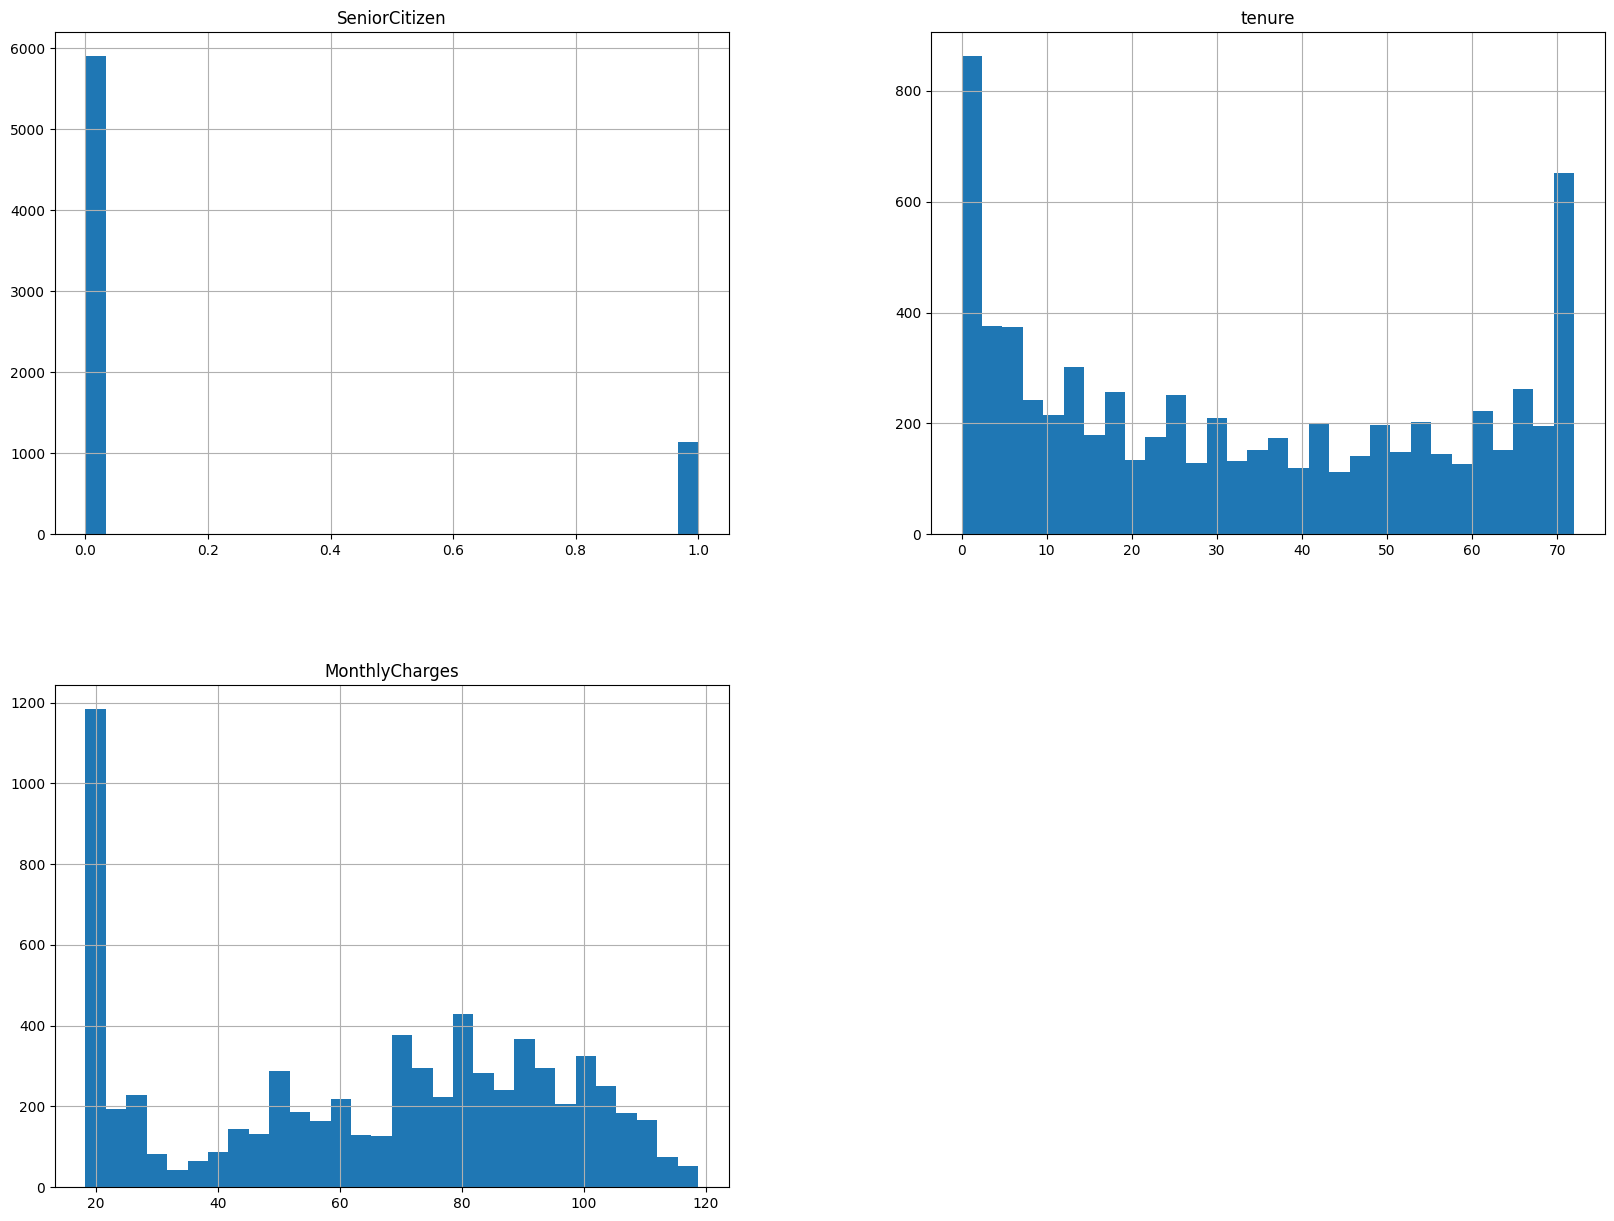

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns.shape

(18,)

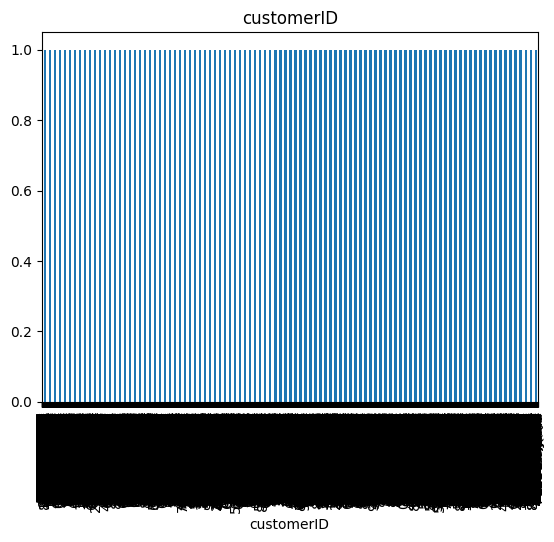

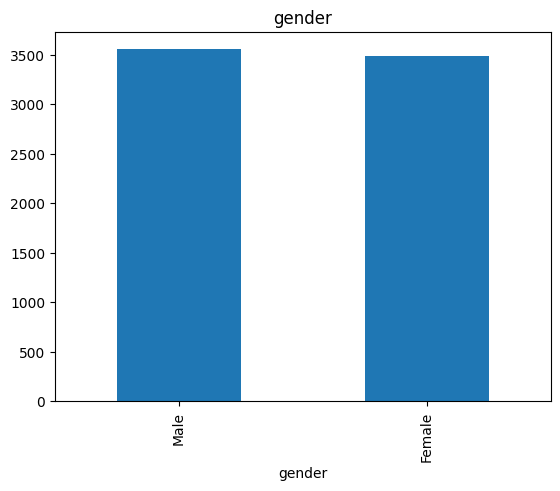

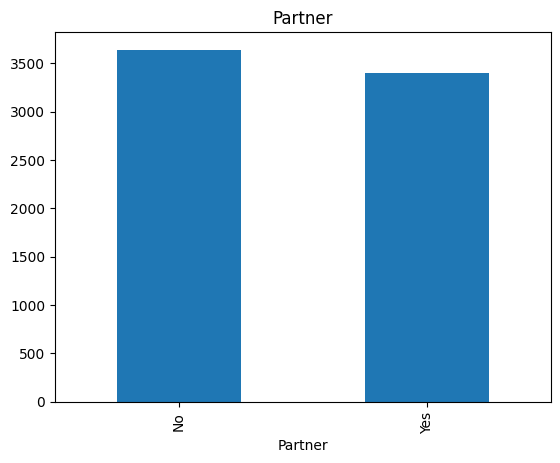

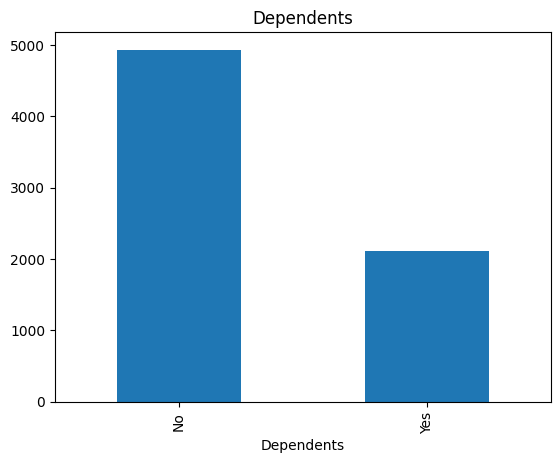

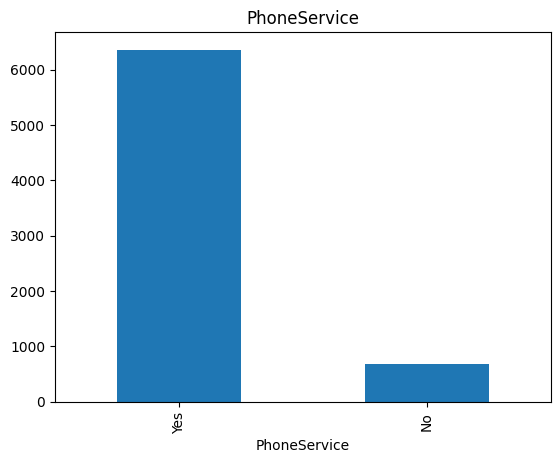

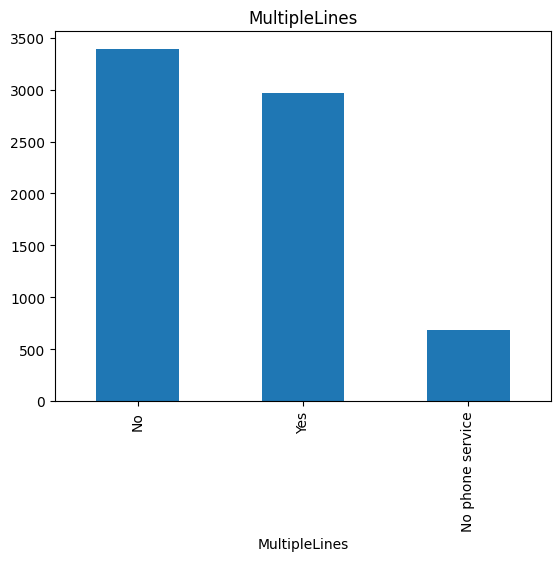

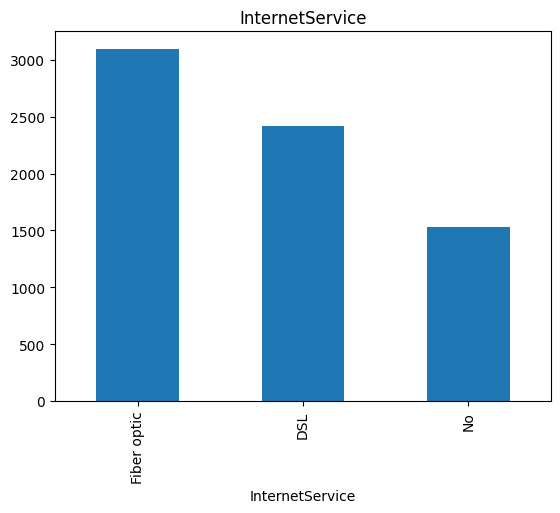

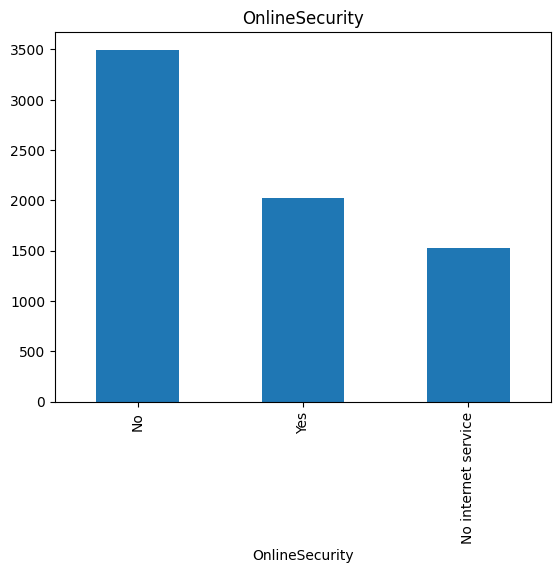

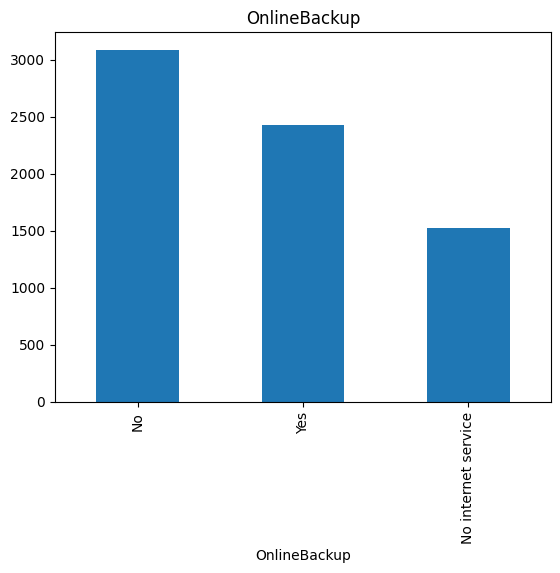

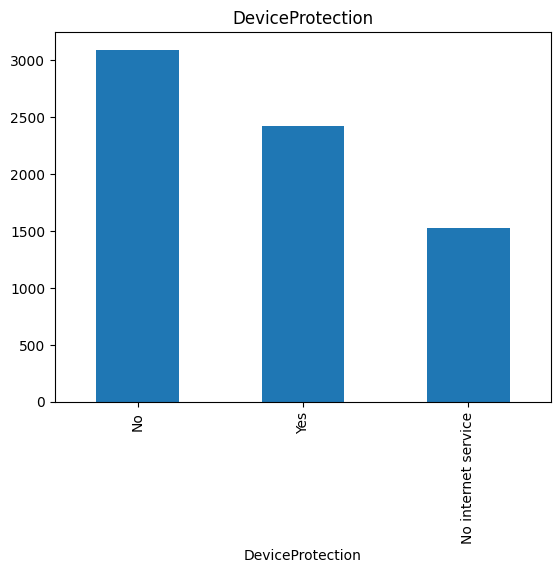

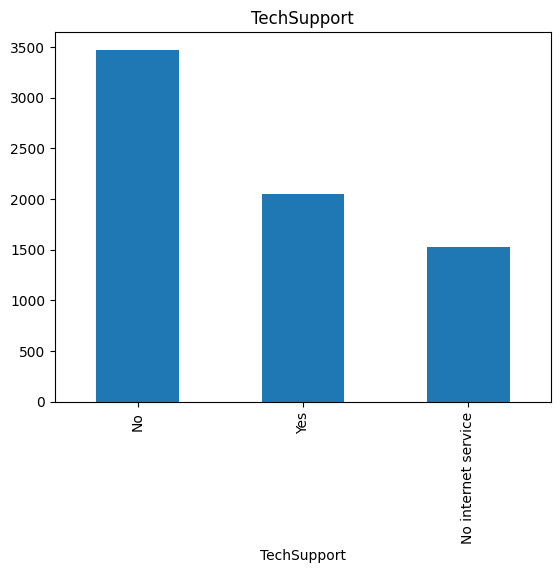

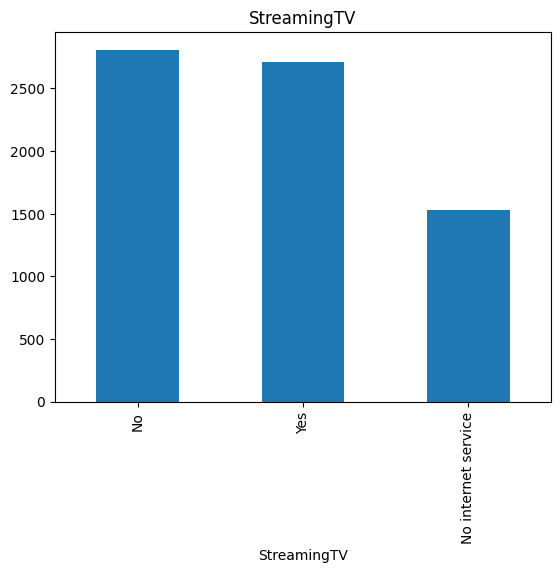

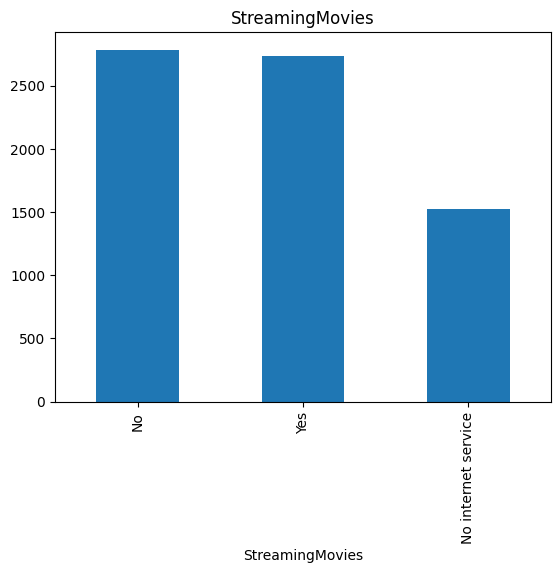

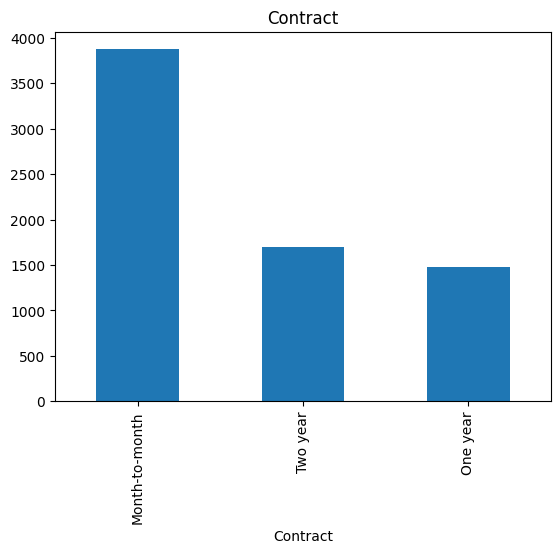

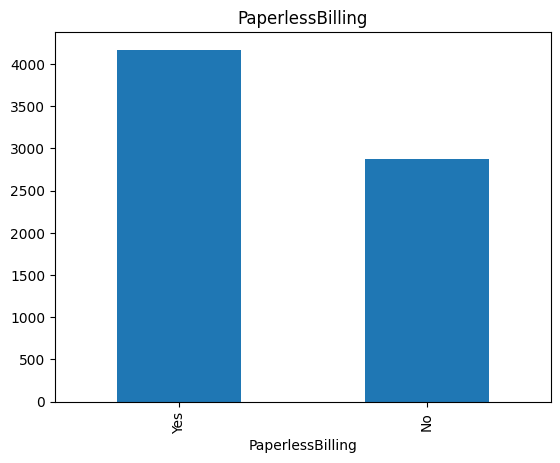

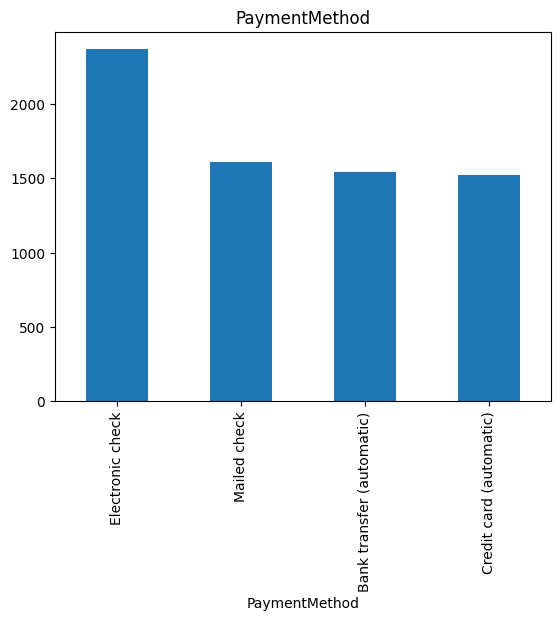

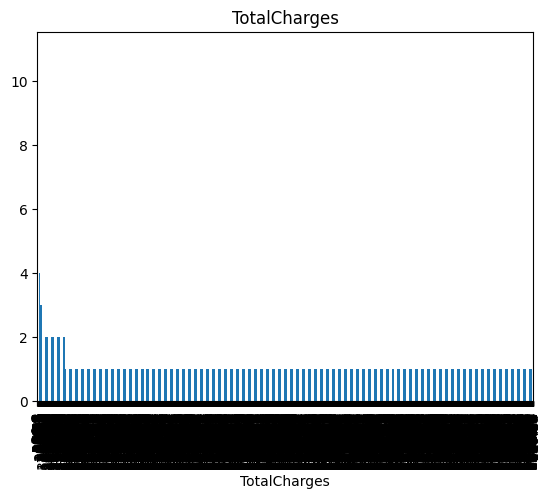

In [ ]:

for column in categorical_columns:
  if column != 'Churn':
   df[column].value_counts().plot(kind='bar')
   plt.title(column)
   plt.show()


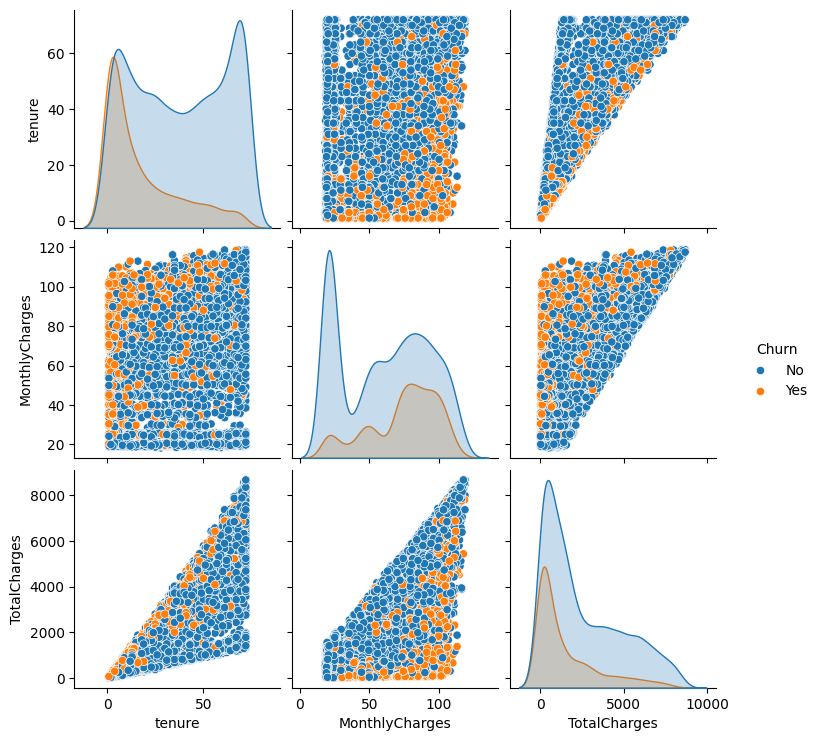

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
sns.pairplot(df, hue='Churn', vars=['tenure','MonthlyCharges','TotalCharges'])
plt.show()


In [ ]:
#using data preprocessing steps we have removed all the missing values from TotalCharges
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


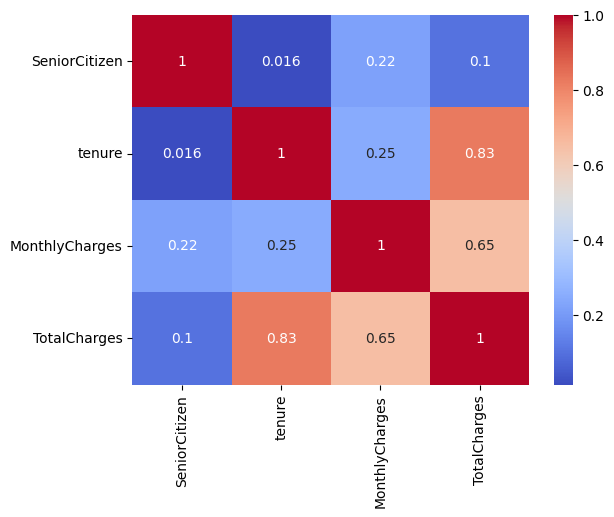

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Feature Encoding**

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [ ]:
print(df_encoded.columns.tolist())

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'customerID_0002-ORFBO', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-DINOC', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', 'customerID_0021-IKXGC', 'customerID_0022-TCJCI', 'customerID_0023-HGHWL', 'customerID_0023-UYUPN', 'customerID_0023-XUOPT', 'customerID_0027-KWYKW', 'customerID_0030-FNXPP', 'customerID_0031-PVLZI', 'customerID_0032-PGELS', 'customerID_0036-IHMOT', 'customerID_0040-HALCW', 'customerID_0042-JVWOJ', 'customerID_0042-RLHYP', 'customerID_0048-LUMLS', 'customerID_0048-PIHNL', 'customerID_0052-DCKON', 'customerID_0052-YNYOT', 'customerID_0056-EPFBG', 'customerID_0057-QBUQH', 'customerID_0058-EVZWM', 'customerID_0

# **Data preparation**

In [ ]:
from sklearn.preprocessing import StandardScaler
y = df_encoded['Churn_Yes']
X = df_encoded.drop('Churn_Yes', axis=1)

# **Train-test-split**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: (5625, 7078)
shape of X_test: (1407, 7078)
shape of y_train: (5625,)
shape of y_test: (1407,)


# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Model building**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
cross_val_score(classifier,X,y, cv=5)

array([1., 1., 1., 1., 1.])

# **Model prediction**

In [ ]:
y_test_pred = classifier.predict(X_test_scaled)

# **Evaluation**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
accuracy = accuracy_score(y_test,y_test_pred)
print("accuracy:", accuracy)

accuracy: 0.9779673063255153


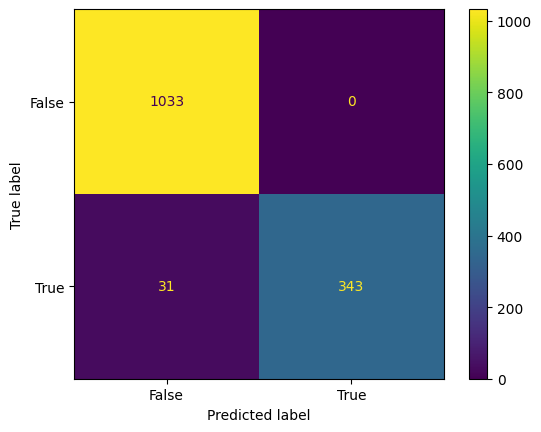

In [ ]:
conf_matrix=confusion_matrix(y_test,y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = classifier.classes_ )
disp.plot()
plt.show()

In [ ]:
class_report=classification_report(y_test,y_test_pred)
print("Classification Report:", class_report)

Classification Report:               precision    recall  f1-score   support

       False       0.97      1.00      0.99      1033
        True       1.00      0.92      0.96       374

    accuracy                           0.98      1407
   macro avg       0.99      0.96      0.97      1407
weighted avg       0.98      0.98      0.98      1407

